# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [37]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [38]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


(0.0, 10.5)

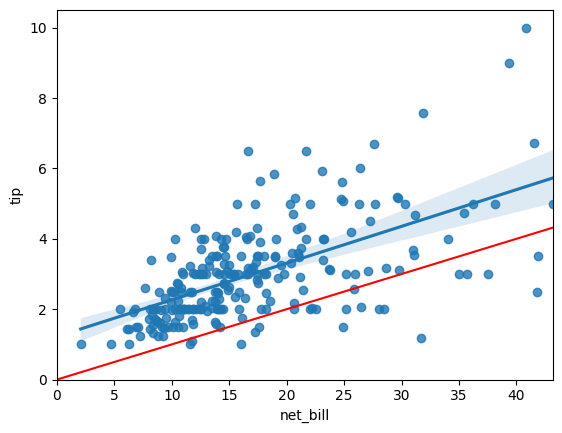

In [39]:
# Gráfico de dispersão
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])

x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

plt.plot(x, y, '-r', label='linha dos 10%')

plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [40]:
model = smf.ols(formula='tip_pct ~ net_bill', data=tips)
results = model.fit()

In [41]:
# Obtendo o valor de R-quadrado do modelo
r_squared = results.rsquared

# Exibindo o valor de R-quadrado
print("R-quadrado do modelo:", r_squared)

R-quadrado do modelo: 0.09129084920662944


In [42]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Mon, 04 Mar 2024   Prob (F-statistic):           1.52e-06
Time:                        12:38:56   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


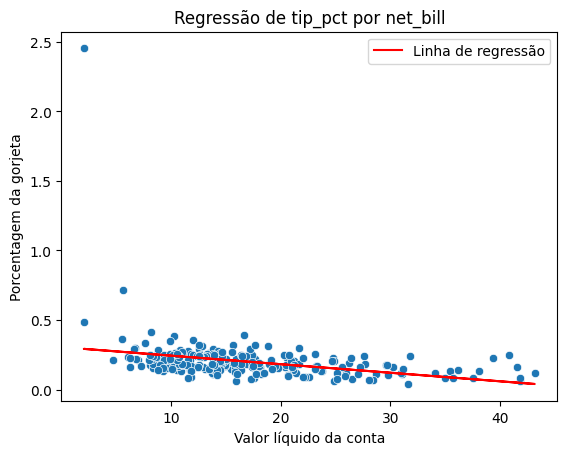

In [43]:
# Gráfico de dispersão com a linha de regressão ajustada
sns.scatterplot(x='net_bill', y='tip_pct', data=tips)
plt.plot(tips['net_bill'], results.fittedvalues, color='red', label='Linha de regressão')
plt.xlabel('Valor líquido da conta')
plt.ylabel('Porcentagem da gorjeta')
plt.title('Regressão de tip_pct por net_bill')
plt.legend()
plt.show()

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

![Group 1321314321.png](<attachment:Group 1321314321.png>)
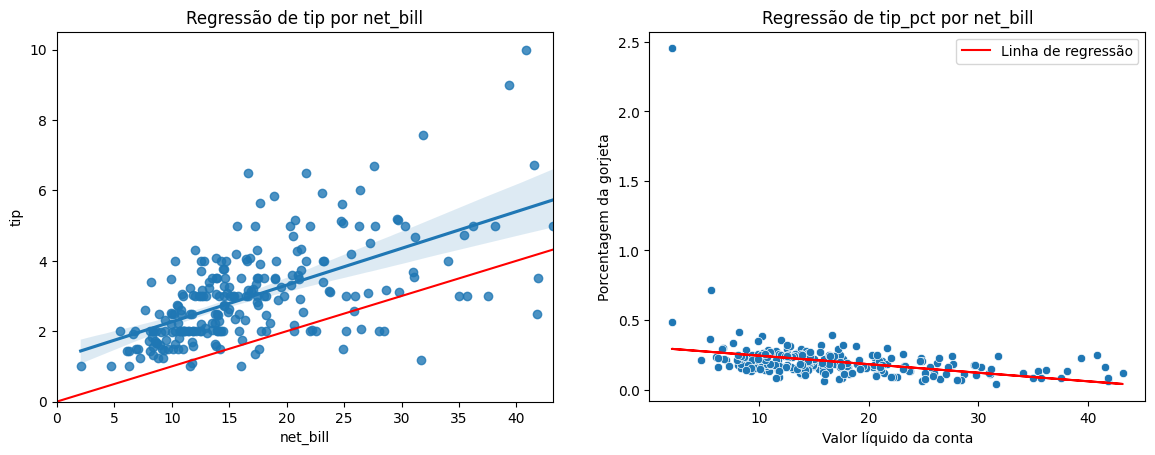

A linha de regressão no primeiro gráfico tem uma inclinação mais acentuada, indicando uma correlação positiva mais forte entre o valor líquido da conta e o valor da gorjeta. No segundo gráfico, a linha de regressão é quase plana, acho que não há uma correlação significativa entre o valor líquido da conta e a porcentagem da gorjeta.

O r-quadrado alto do primeiro gráfico indica que uma grande proporção da variância na gorjeta pode ser explicada pelo valor líquido da conta. Da mesma forma, um r-quadrado alto no segundo gráfico indica que uma grande proporção da variância na porcentagem da gorjeta pode ser explicada pelo valor líquido da conta.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

1. obtenha o valor predito ```pred``` para ```tip_pct``` 

In [44]:
tips['pred_tip_pct'] = results.predict(tips)
print(tips['pred_tip_pct'])

0      0.207087
1      0.251951
2      0.197684
3      0.180107
4      0.176358
         ...   
239    0.163268
240    0.150546
241    0.178264
242    0.206534
243    0.208316
Name: pred_tip_pct, Length: 244, dtype: float64


2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```

In [45]:
tips['pred_tip'] = tips['tip_pct'] * tips['net_bill']
print(tips['pred_tip'])

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: pred_tip, Length: 244, dtype: float64


3. calcule o $R^2$ do modelo para ```tip```

In [46]:
# Ajustando o modelo de regressão
model = smf.ols(formula='tip ~ net_bill', data=tips)
results = model.fit()

# Obtendo o valor de R-quadrado do modelo
r_squared = results.rsquared

# Exibindo o valor de R-quadrado
print("R-quadrado do modelo:", r_squared)


R-quadrado do modelo: 0.3325407312323707


4. compare esse $R^2$ com o do item 1

O R-quadrado do modelo 1, aproximadamente `9.13%` da variância na gorjeta pode ser explicada pelo valor líquido da conta. Por isso acho que o valor líquido da conta não é um bom preditor da gorjeta, já que a maior parte da variância na gorjeta não é explicada por ele.

Já o R-quadrado do modelo 2, aproximadamente `33.25%` da variância na porcentagem da gorjeta pode ser explicada pelo valor líquido da conta. Provavelmente o valor líquido da conta é um preditor relativamente melhor da porcentagem da gorjeta do que da gorjeta em si.